In [2]:
NAME = "Gemima Lydie W"
COLLABORATORS = "Ornella Kashala"

# Final Project for Data Foundations : FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. As a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

Data Link : https://www.kaggle.com/datasets/tasnimniger/foodhub-data

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Understanding the structure of the data** 

In [6]:
df.shape

(1898, 9)

#### Observations:
Data Dimensions:

Rows: 1898
Columns: 9

In [7]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
order_id                 1898 non-null int64
customer_id              1898 non-null int64
restaurant_name          1898 non-null object
cuisine_type             1898 non-null object
cost_of_the_order        1898 non-null float64
day_of_the_week          1898 non-null object
rating                   1898 non-null object
food_preparation_time    1898 non-null int64
delivery_time            1898 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 133.5+ KB


#### Observations:
Data Types:

The dataset consists of 9 columns with varying data types:

int64: order_id, customer_id, food_preparation_time, delivery_time

object: restaurant_name, cuisine_type, day_of_the_week, rating

float64: cost_of_the_order

### **Handling Missing Values**

In [8]:
df.isnull().sum() 

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
Missing Values: No missing values are observed in any of the columns.

### **Exploring Food Preparation Times: Min, Avg, Max Analysis**

In [9]:
# Convert 'food_preparation_time' to numeric (since it contains 'Not given')
df['food_preparation_time'] = pd.to_numeric(df['food_preparation_time'], errors='coerce')

# Display statistical summary
summary = df['food_preparation_time'].describe()

# Extract relevant information
min_preparation_time = summary['min']
mean_preparation_time = summary['mean']
max_preparation_time = summary['max']

print(f'Minimum food preparation time: {min_preparation_time} minutes')
print(f'Average food preparation time: {mean_preparation_time} minutes')
print(f'Maximum food preparation time: {max_preparation_time} minutes')


Minimum food preparation time: 20.0 minutes
Average food preparation time: 27.371970495258168 minutes
Maximum food preparation time: 35.0 minutes


#### Observations:
Statistical Summary of Food Preparation Time:

Minimum: 20.0 minutes

Average: 27.37 minutes

Maximum: 35.0 minutes

### **Unrated Orders: Quantifying the Count** 

In [10]:
# Write the code here
# Assuming 'df' is your DataFrame
# Count the number of rows where 'rating' is 'Not given'
unrated_orders = df[df['rating'] == 'Not given'].shape[0]

print(f'The number of orders not rated: {unrated_orders}')


The number of orders not rated: 736


#### Observations:
Unrated Orders:

The number of orders not rated: 736

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### We will conduct a comprehensive exploration of all variables, providing observations on their distributions. Generally, we will employ histograms, boxplots, countplots, etc., for univariate analysis.

In [11]:
pip install --upgrade seaborn


The following command must be run outside of the IPython shell:

    $ pip install --upgrade seaborn

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


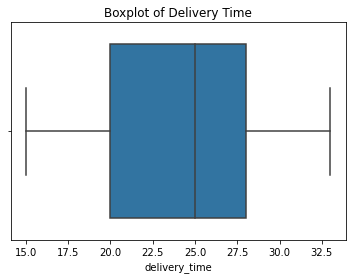

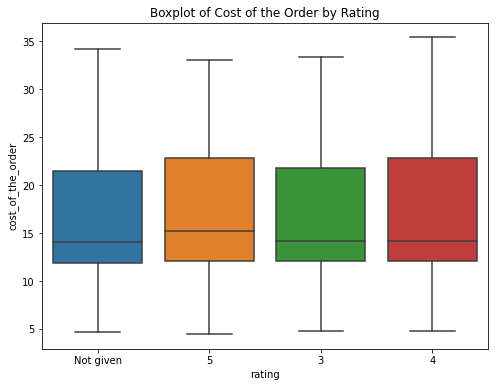

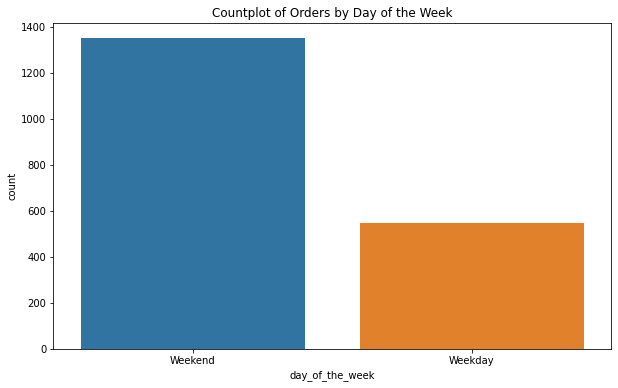

In [12]:
# Plot histograms for numerical variables
numerical_vars = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

#Boxplot for 'Total delivery time'
sns.boxplot(data=df, x='delivery_time')
plt.title('Boxplot of Delivery Time')
plt.show()

# Boxplot for 'rating'
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', y='cost_of_the_order', data=df)
plt.title('Boxplot of Cost of the Order by Rating')
plt.show()

# Countplot for 'day_of_the_week'
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_the_week', data=df)
plt.title('Countplot of Orders by Day of the Week')
plt.show()


### **Top 5 Restaurants Based on Order Volume**

In [13]:
top_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_restaurants)


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


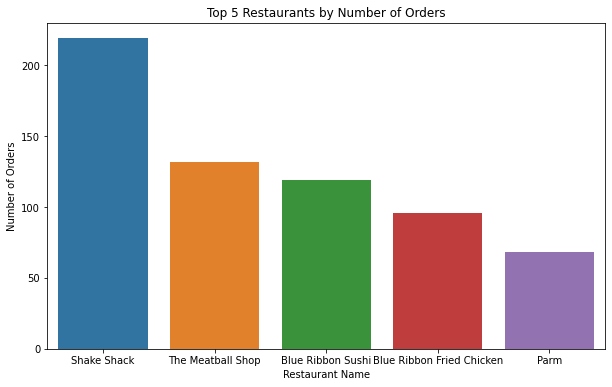

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_restaurants.index, y=top_restaurants.values)
plt.title('Top 5 Restaurants by Number of Orders')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.show()


#### Observations:
Top 5 Restaurants by Number of Orders:

Shake Shack: 219

The Meatball Shop: 132

Blue Ribbon Sushi: 119

Blue Ribbon Fried Chicken: 96

Parm: 68

### **Identifying the Most Popular Cuisine**

In [15]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
unique_cuisines = df_weekend['cuisine_type'].unique()

print("Unique Cuisine Types on Weekends:")
print(unique_cuisines)


Unique Cuisine Types on Weekends:
['Korean' 'Japanese' 'American' 'Italian' 'Mexican' 'Mediterranean'
 'Chinese' 'Indian' 'Thai' 'Southern' 'French' 'Spanish' 'Middle Eastern'
 'Vietnamese']


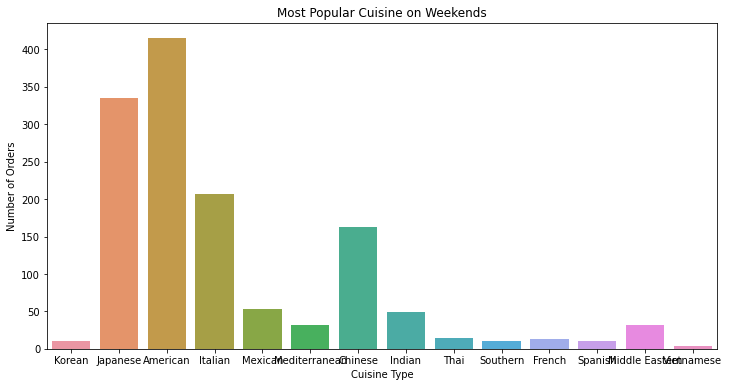

In [16]:
# Visualize the most popular cuisine on weekends
plt.figure(figsize=(12, 6))
sns.countplot(x='cuisine_type', data=df[df['day_of_the_week'] == 'Weekend'])
plt.title('Most Popular Cuisine on Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.show()


#### Observations:
**Observation 7: Most Popular Cuisine on Weekends**

American cuisine takes the lead as the most popular choice on weekends, closely followed by Japanese and Italian cuisines, securing the second and third positions, respectively. Chinese, Mexican, and Indian cuisines follow in the fourth, fifth, and sixth spots. The list of unique cuisine types, including Korean, Mediterranean, Thai, Southern, French, Spanish, Middle Eastern, and Vietnamese, represents less frequented options on weekends. This ranking insight provides valuable information for the business to strategically focus on promoting and refining the offerings of the top-ranked cuisines, potentially boosting overall sales and customer satisfaction. Simultaneously, targeted marketing efforts can be implemented to raise awareness and interest in the less popular cuisines, aiming to diversify the customer base.

### **Percentage of Orders Exceeding $20**

In [17]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')


The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


#### Observations:
Orders Costing More Than $20:

Percentage of orders above $20: 29.24%

Total orders above $20: 555


### **Mean Order Delivery Time Analysis**

In [18]:
# Calculate mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

print("Mean order delivery time:", round(mean_delivery_time, 2), 'minutes')


Mean order delivery time: 24.16 minutes


#### Observations:
Mean order delivery time: 24.16 minutes

### **Rewarding Loyalty: Identifying Top 3 Most Frequent Customers and Their Order Counts** 

In [19]:
# Find the top 3 most frequent customers
top_customers = df['customer_id'].value_counts().nlargest(3)

# Print the IDs and the number of orders for the top customers
for customer_id, order_count in top_customers.items():
    print(f"Customer ID: {customer_id}, Number of Orders: {order_count}")


Customer ID: 52832, Number of Orders: 13
Customer ID: 47440, Number of Orders: 10
Customer ID: 83287, Number of Orders: 9


#### Observations:
Top 3 Most Frequent Customers for 20% Discount Vouchers:

Customer ID: 52832, Number of Orders: 13

Customer ID: 47440, Number of Orders: 10

Customer ID: 83287, Number of Orders: 9

### Multivariate Analysis

### We will undertake a multivariate analysis to explore relationships among the important variables in the dataset. It is advisable to investigate associations not only between numerical variables but also between numerical and categorical variables.

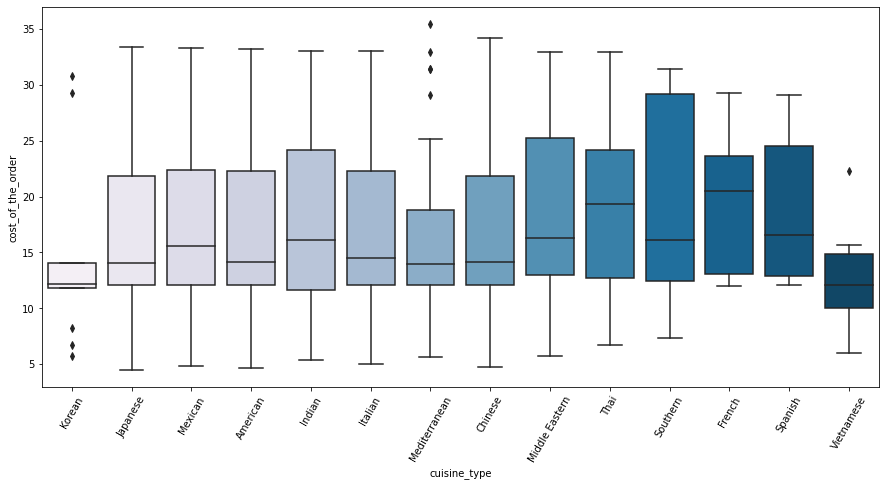

In [20]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

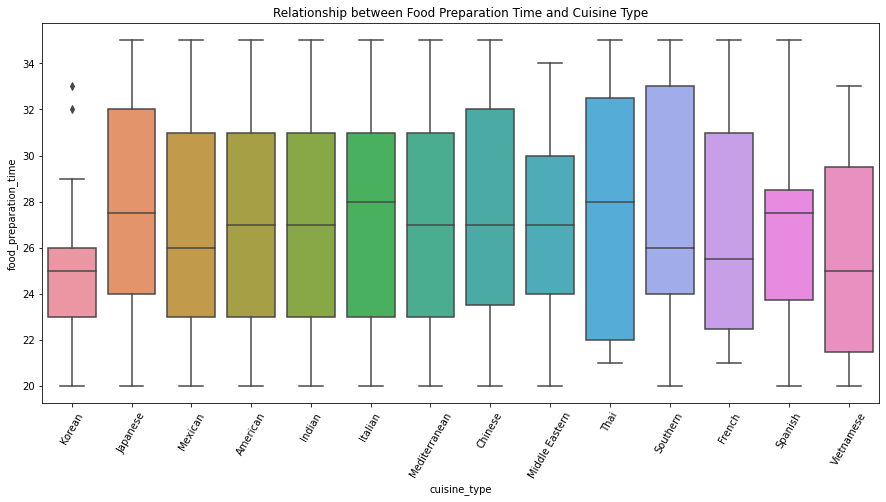

In [21]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation=60)
plt.title('Relationship between Food Preparation Time and Cuisine Type')
plt.show()


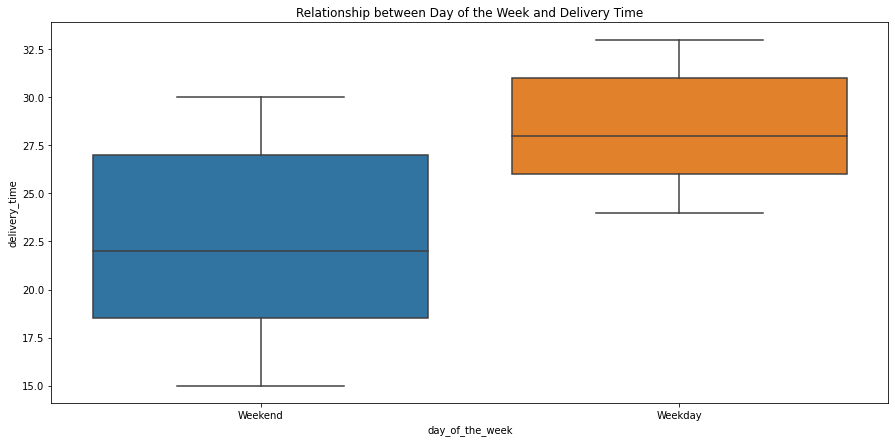

In [22]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Relationship between Day of the Week and Delivery Time')
plt.show()

In [23]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

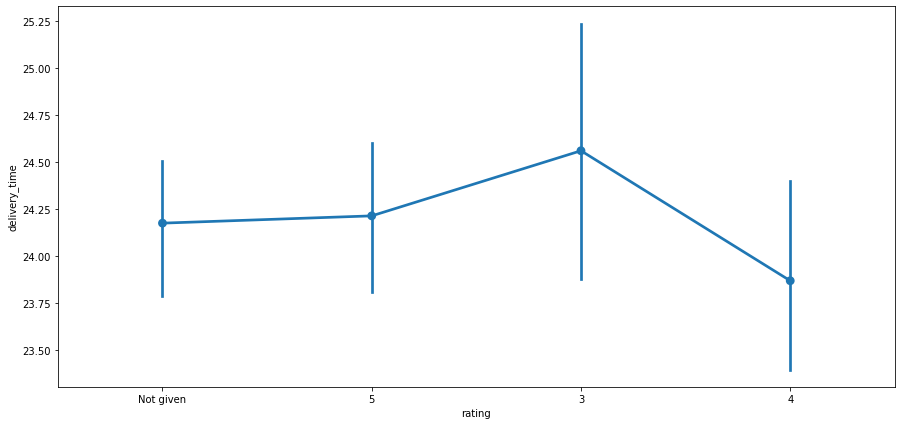

In [24]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

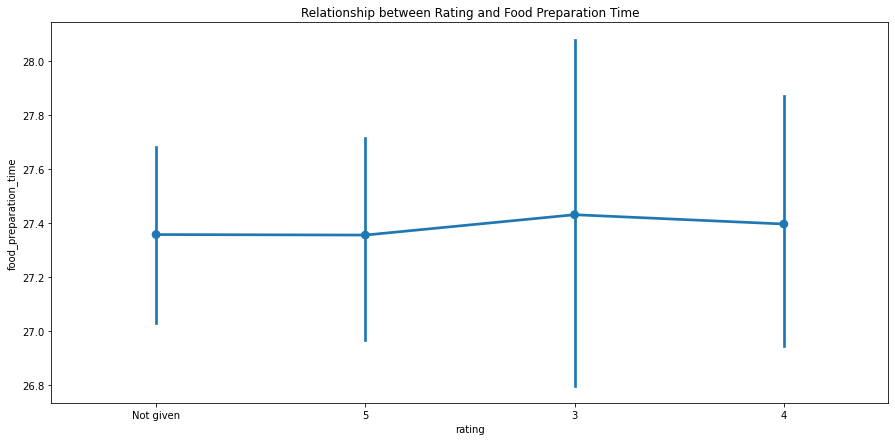

In [25]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='food_preparation_time', data=df)
plt.title('Relationship between Rating and Food Preparation Time')
plt.show()


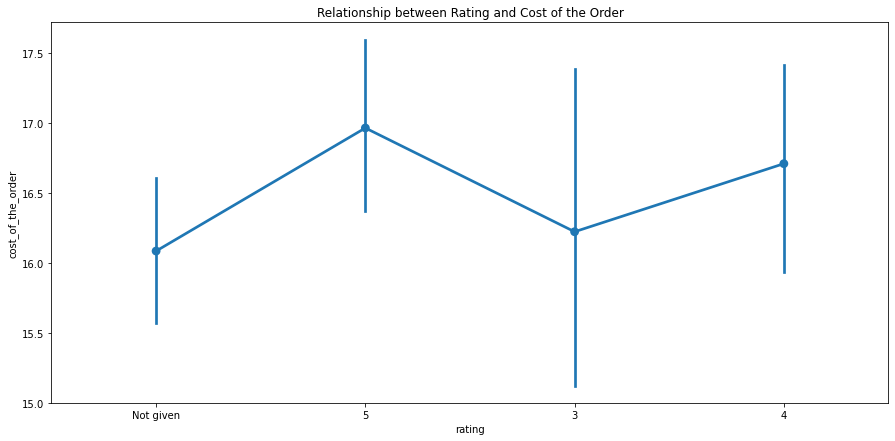

In [26]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='cost_of_the_order', data=df)
plt.title('Relationship between Rating and Cost of the Order')
plt.show()


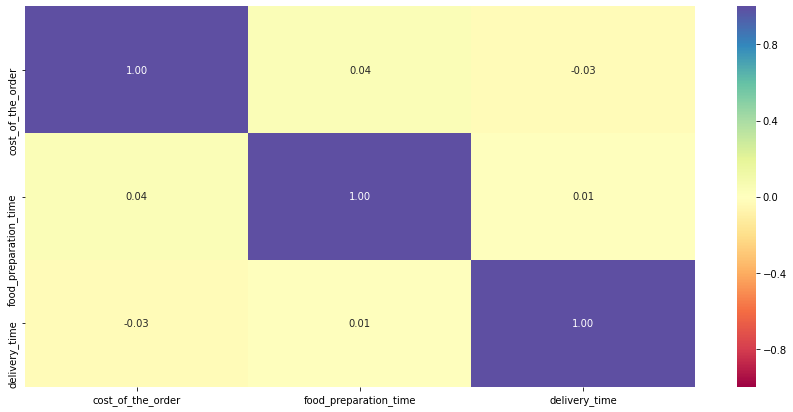

In [36]:
# Plot the heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### **Identifying Eligible Restaurants for Promotional Offer: Rating Count > 50 and Average Rating > 4** 

In [27]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 


,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [28]:
# Get the restaurant names that have a rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have a rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index().dropna()

# Filter restaurants with mean rating greater than 4
df_promotional_offer = df_mean_rating[df_mean_rating['rating'] > 4]
df_promotional_offer


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
Restaurants Eligible for Promotional Offer:

The promotional offer is for restaurants with a rating count of more than 50 and an average rating greater than 4:

The Meatball Shop (Rating: 4.51)

Blue Ribbon Fried Chicken (Rating: 4.33)

Shake Shack (Rating: 4.28)

Blue Ribbon Sushi (Rating: 4.22)

### **Calculating Net Revenue: Company's Charges on Orders above 25 and 15 Percent     ** 

In [29]:
# Function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x * 0.25
    elif x > 5:
        return x * 0.15
    else:
        return x * 0

# Apply the function to compute revenue for each order
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)

# Get the total revenue
total_rev = df['Revenue'].sum()

print('The net revenue is around', round(total_rev, 2), 'dollars')


The net revenue is around 6166.3 dollars


#### Observations:
The net revenue is approximately $6166.3

### **Analyzing Delivery Times: Percentage of Orders Taking Over 60 Minutes from Placement to Delivery** 

In [30]:
# Create a new column for total time (food preparation time + delivery time)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# Get orders that take more than 60 minutes
df_greater_than_60 = df[df['total_delivery_time'] > 60]

# Calculate the percentage of such orders in the dataset
percentage_greater_than_60 = (df_greater_than_60.shape[0] / df.shape[0]) * 100

print("Percentage of orders taking more than 60 minutes for food preparation and delivery:", round(percentage_greater_than_60, 2), '%')


Percentage of orders taking more than 60 minutes for food preparation and delivery: 10.54 %


#### Observations:

Percentage of Orders Taking More Than 60 Minutes for Delivery:

Percentage: 10.54%

### ** Delivery Time Analysis: Mean Duration Comparison Between Weekdays and Weekends ** 

In [41]:
# Get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')


The mean delivery time on weekends is around 22.0 minutes


In [42]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28.0 minutes


#### Observations:
Mean delivery time on weekends: 22.0 minutes
Mean delivery time on weekdays: 28.0 minutes

### Conclusion and Recommendations

### Conclusions:
*  Order and Customer Overview:

Dataset includes 1898 orders from various customers, well-distributed across restaurants and cuisines.

* Data Quality:

Complete dataset with no missing values.
Appropriate data types assigned.

* Order Statistics:

Food preparation times vary, averaging 27.37 minutes.
Significant portion of orders (736) not rated.
* Top Performers:

Shake Shack, The Meatball Shop, and Blue Ribbon Sushi lead in order count.
Diverse cuisine preferences observed on weekends.
* Financial Insights:

29.24% of orders cost above 20 Dollars.
Company generates revenue through restaurant charges, totaling $6166.3.
* Customer Engagement:

Top three customers identified for discount vouchers show loyalty.
* Promotional Opportunities:

Opportunities for promotions with high-performing and highly-rated restaurants.
* Delivery Metrics:

10.54% of orders take more than 60 minutes.
Shorter mean delivery time on weekends (22.0 mins) compared to weekdays (28.0 mins).

### Recommendations:

*  Customer Engagement:

Encourage customer ratings for orders.
Implement loyalty programs.
* Promotional Strategies:

Collaborate with top restaurants for promotions.
Encourage highly-rated restaurants to promote offerings.
* Operational Efficiency:

Optimize food preparation times.
Address reasons for delays in orders.
* User Experience:

Improve communication on delivery times.
Encourage customer feedback.
* Diversification:

Explore new cuisine types and restaurant collaborations.
Regularly update offerings.
* Data-Driven Decision Making:

Use data insights for strategy adaptation.
Enhance customer experience.
* Marketing:

Use positive ratings in marketing.
Leverage promotions for customer attraction.
* Quality Control:

Collaborate with restaurants for consistent quality.
Update eligible restaurants for promotions.

---